In [96]:
# Author: Loren Matilsky
# Created: 12/02/2022
# See more info about Model S on Jorgen's personal webpage:
# https://phys.au.dk/~jcd/solar_models
# Also see the .pdf for description of data
# Modify this file as needed to read in more variables

# read in ASCII data
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import pickle
sys.path.append(os.environ['raco'])
from common import dotdict, g_univ
from scipy.integrate import simpson
f = open("Model_S.txt", "r")
lines = f.readlines()
f.close()

In [40]:
# determine where data starts
lines[:10]

['L5BI.D.15.PRES.950912.AARHUS\n',
 'Level 5 physics, present Sun. (OPAL, LivermoreEOS ). He, Z diffusion.\n',
 'Model S (Christensen-Dalsgaard et al. 1996)\n',
 'https://phys.au.dk/~jcd/solar_models/\n',
 '\n',
 '      2482        15        25       210\n',
 ' 1.989000000E+33 6.959906258E+10 3.845999350E+33 1.962800000E-02 7.090812183E-01\n',
 ' 1.990493515E+00 2.249999861E+00 6.172840271E-03 1.000000000E+00 1.000000000E+00\n',
 '-1.370674456E+02-1.662854139E+02 4.600000017E+09 5.777503437E+03 6.672320000E-08\n',
 ' 6.964865599E+10 8.394798002E-11 4.348192658E+03 9.455873862E+02 3.292484968E-09\n']

In [41]:
lines[6:10]

[' 1.989000000E+33 6.959906258E+10 3.845999350E+33 1.962800000E-02 7.090812183E-01\n',
 ' 1.990493515E+00 2.249999861E+00 6.172840271E-03 1.000000000E+00 1.000000000E+00\n',
 '-1.370674456E+02-1.662854139E+02 4.600000017E+09 5.777503437E+03 6.672320000E-08\n',
 ' 6.964865599E+10 8.394798002E-11 4.348192658E+03 9.455873862E+02 3.292484968E-09\n']

In [42]:
lines[6].split()

['1.989000000E+33',
 '6.959906258E+10',
 '3.845999350E+33',
 '1.962800000E-02',
 '7.090812183E-01']

In [43]:
# actually doesn't work because the negative values "touch" values to their left
# maybe just split things up by each number (has character width 16)
st = ''
for line in lines[6:]: 
    st += line.replace('\n', '')
len(st)/16

62065.0

In [44]:
ndata = 62065
data = []
for i in range(ndata):
    data.append(float(st[16*i:16*(i+1)]))
data = np.array(data)
print(len(data))

62065


In [45]:
# compare first and last data vals
print (lines[6:8])
print (data[:10])

[' 1.989000000E+33 6.959906258E+10 3.845999350E+33 1.962800000E-02 7.090812183E-01\n', ' 1.990493515E+00 2.249999861E+00 6.172840271E-03 1.000000000E+00 1.000000000E+00\n']
[1.98900000e+33 6.95990626e+10 3.84599935e+33 1.96280000e-02
 7.09081218e-01 1.99049352e+00 2.24999986e+00 6.17284027e-03
 1.00000000e+00 1.00000000e+00]


In [46]:
print (lines[-2:])
print (data[-10:])

['-2.754367381E-18 2.028474614E-02 6.959906258E+10-1.390014546E-01 0.000000000E+00\n', ' 7.484873918E-06 0.000000000E+00 0.000000000E+00 5.132910511E-03 9.159690889E-03']
[-2.75436738e-18  2.02847461e-02  6.95990626e+10 -1.39001455e-01
  0.00000000e+00  7.48487392e-06  0.00000000e+00  0.00000000e+00
  5.13291051e-03  9.15969089e-03]


In [47]:
# all looks good!

In [48]:
# separate into global variables
glob = data[:15]
profs = data[15:]
len(profs)/300

206.83333333333334

In [49]:
len(profs)/2482

25.0

In [50]:
nr = 2482
nq = 25
profs[::nq]

array([6.96486560e+10, 6.96481085e+10, 6.96475567e+10, ...,
       5.81765728e+08, 5.77113851e+08, 1.00000000e-49])

In [51]:
profs2 = np.zeros((nq, nr))
for iq in range(nq):
    profs2[iq, :] = profs[iq::nq]
profs2

array([[ 6.96486560e+10,  6.96481085e+10,  6.96475567e+10, ...,
         5.81765728e+08,  5.77113851e+08,  1.00000000e-49],
       [ 8.39479800e-11,  8.38913253e-11,  8.38311537e-11, ...,
        -9.66079749e+00, -9.68482704e+00, -1.38155106e+02],
       [ 4.34819266e+03,  4.34848841e+03,  4.34881643e+03, ...,
         1.56435238e+07,  1.56439097e+07,  1.56678808e+07],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.58774841e-03,  4.58774841e-03,  4.58774841e-03, ...,
         5.11364248e-03,  5.11394851e-03,  5.13291051e-03],
       [ 9.78239892e-03,  9.78239892e-03,  9.78239892e-03, ...,
         9.18169968e-03,  9.18135012e-03,  9.15969089e-03]])

In [52]:
# now lets package the output as a dictionary
di = dotdict()
di.msun = glob[0] # mass of sun
di.rsun = glob[1] # radius of sun
di.lsun = glob[2] # luminosity of sun
di.zsun = glob[3] # metallicity of sun (heavy element abundance Z)
di.x0sun = glob[4] # initial hydrogen abundance X_0
di.alphasun = glob[5]  # mixing-length parameter: alpha = ell / H_prs
di.agesun = glob[12] # age of sun

In [53]:
di

{'msun': 1.989e+33,
 'rsun': 69599062580.0,
 'lsun': 3.84599935e+33,
 'zsun': 0.019628,
 'x0sun': 0.7090812183,
 'alphasun': 1.990493515,
 'agesun': 4600000017.0}

In [54]:
# pretty good...

In [55]:
di.rr = profs2[0]
di.lnq = profs2[1]

(0.0, 300000.0)

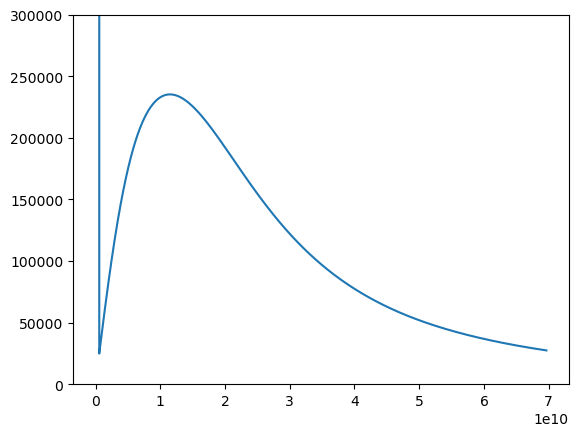

In [56]:
# sense check I understand what's happening
di.grav = g_univ*np.exp(di.lnq)*di.msun/di.rr**2
plt.plot(di.rr, di.grav)
plt.ylim(0,3e5)

In [57]:
# okay looks fine (except at r=0)

In [63]:
di.tmp = profs2[2]
di.prs = profs2[3]
di.rho = profs2[4]
di.xfrac = profs2[5] # hydrogen per mass
di.lum = profs2[6] # L(r)
di.opa = profs2[7] # opacity(r)
di.eps = profs2[8] # nuclear generation rate (r)
di.gamma = profs2[9] # first adiabatic exponent (dlnp/dlnrho)_ad
di.gamma_ad = profs2[10] # adiabatic gradient: (dlnT/dlnp)_ad
di.delta = profs2[11] # coeff. vol. expansion: -(dlnrho/dlnT)_p
di.c_p = profs2[12] # pressure specific heat
di.mue = 1./profs2[13] # mean mol. weight of electrons
amu = 1.66054e-24
di.Ne = 1/(amu*di.mue) # no. electrons per unit mass
di.ne = di.Ne*di.rho # n_e: no. electrons per cm^3
di.dsdr = di.c_p/di.rr*profs2[14] # profs2[14] = 1 / gam1 * dlnP/dlnr - dlnrho/dlnr
            # = (dlnrho/dlnr)_ad - dlnrho/dlnr
di.nsq = di.dsdr*di.grav/di.c_p
di.zfrac = profs[16]

(1e+22, 1e+26)

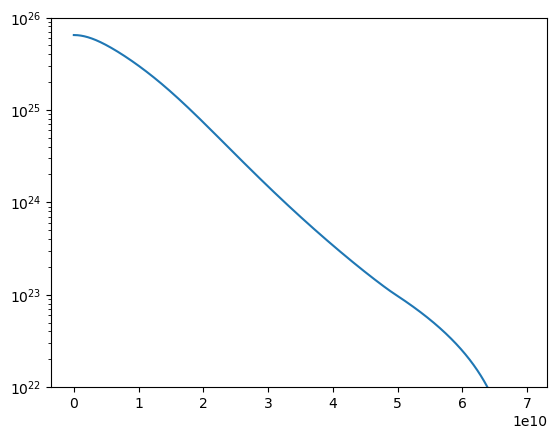

In [66]:
# plot electron density---for Coulomb logarithm
plt.figure()
plt.plot(di.rr, di.ne)
plt.yscale('log')
plt.ylim(1e22, 1e26)

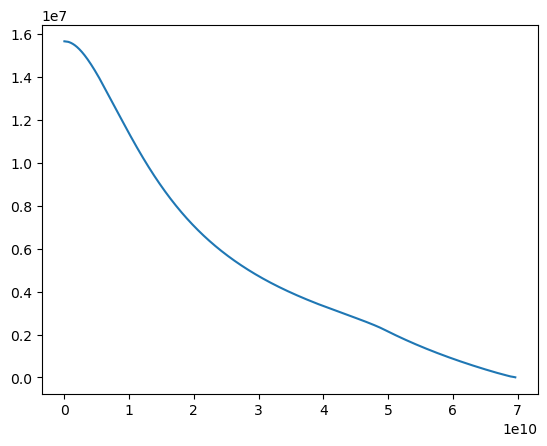

In [70]:
# plot temperature--for Coulomb logarithm
plt.figure()
plt.plot(di.rr, di.tmp)
#plt.yscale('log')
#plt.ylim(1e6,2e7)

In [73]:
# compute molecular diffusion coefficients
# Use Miesch 2005, LRSP, 2, 1, p. 34
# Check for updates here: http://www.livingreviews.org/lrsp-2005-1

# For eta(r) use Garaud (1999) (don't trust Miesch 2005 in this case particularly)
# approximate ln Lambda as varying linearly from 2.5 at r=0 to 3.5 at r = r_0
# trust Pascale on Coulomb Logarithm
slope = 1./5.0e10
lnlambda = 2.5 + di.rr*slope

# molecular diffusions
di.nu = 1.2e-16*di.tmp**(5/2)/di.rho
sig_sb = 5.6704e-5 # Stefan-Boltzmann constant
di.kappa = 16*sig_sb*di.tmp**3/(3*di.opa*di.rho**2*di.c_p)
#di.eta = 1e13*di.tmp**(-1.5) # from Miesch 2005
di.eta = 5.20e11*lnlambda*di.tmp**(-1.5) # from Garaud (1999)

# molecular Prandtl numbers
di.prm = di.nu/di.eta
di.pr = di.nu/di.kappa

# (I convinced myself that the thermal diffusivity associated with Coulomb collisions
# was the same as nu, for an ionized-hydrogen plasma (Collins 1989, eq. 4.4.4, p. 95))

#plt.figure()
#plt.plot(di.rr,lnlambda)

In [74]:
# compute derivatives of thermal variables numerically
di.drhodr = np.gradient(di.rho, di.rr)
di.dtmpdr = np.gradient(di.tmp, di.rr)
di.dprsdr = np.gradient(di.prs, di.rr)

di.dlnrho = di.drhodr/di.rho
di.dlntmp = di.dtmpdr/di.tmp
di.dlnprs = di.dprsdr/di.prs

err hydro balance = 0.0004223962900281747


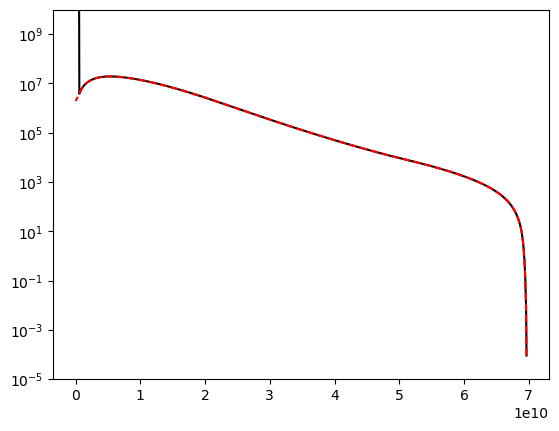

In [75]:
# test hydrostatic balance
plt.plot(di.rr, di.rho*di.grav, 'k', label='rho*g')
plt.plot(di.rr, -di.dprsdr, 'r--', label='-dP/dr')
plt.yscale('log')
plt.ylim(1e-5,1e10)
err = (di.rho*di.grav+di.dprsdr)/di.dprsdr
print ("err hydro balance =", np.mean(np.abs(err[:-1])))

err ideal gas = 0.024694927601119934
r < rcut = 6.611e+10 cm
err at rcut = 0.104


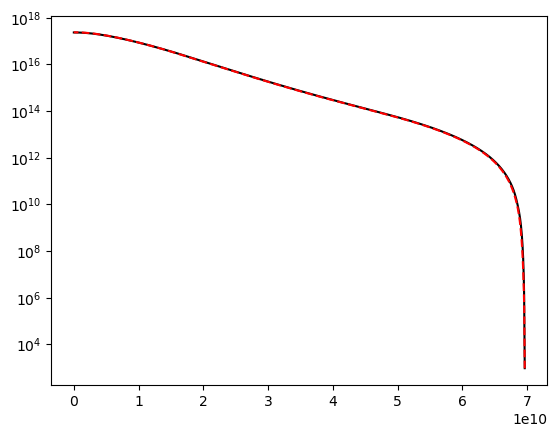

In [76]:
# test ideal gas
di.gas_constant = (di.gamma - 1.)*di.c_p/di.gamma

# test hydrostatic balance
plt.plot(di.rr, di.rho*di.gas_constant*di.tmp, 'k', label='rho*R*T')
plt.plot(di.rr, di.prs, 'r--', label='P')
plt.yscale('log')
#plt.ylim(1e-5,1e10)
err = (di.rho*di.gas_constant*di.tmp - di.prs)/di.prs
icut = 1000
print ("err ideal gas =", np.mean(np.abs(err[icut:])))
print ("r < rcut = %1.3e cm" %di.rr[icut])
print ("err at rcut = %.3f" %err[icut])

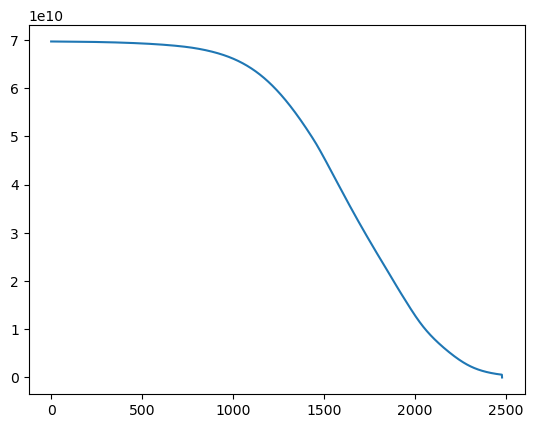

In [77]:
plt.plot(di.rr)

Text(0.5, 0, 'r')

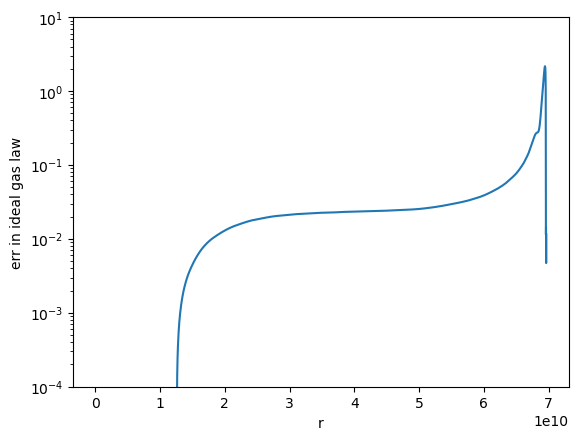

In [78]:
plt.plot(di.rr,err)
plt.yscale('log')
plt.ylim(1e-4,10)
plt.ylabel('err in ideal gas law')
plt.xlabel('r')

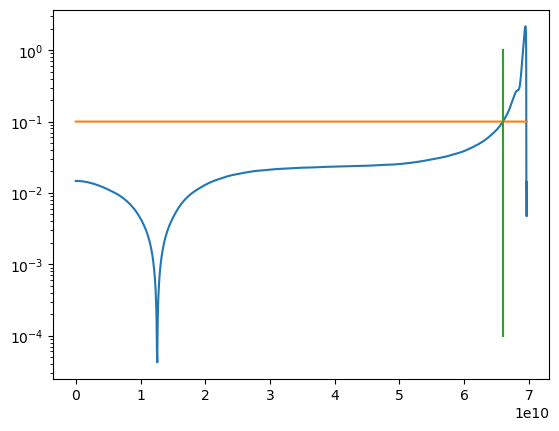

In [79]:
# figure out where ideal gas law is wrong by ~10%
err_ideal = np.abs((di.prs - di.rho*di.gas_constant*di.tmp)/di.prs)
plt.plot(di.rr, err_ideal)

# bracket the 10% error
r1, r2 = 5e10, 6.8e10
ir1, ir2 = np.argmin(np.abs(di.rr - r1)), np.argmin(np.abs(di.rr - r2))

di.ircut = ir2 + np.argmin(np.abs(err_ideal[ir2:] - 0.1))
di.rcut = di.rr[di.ircut]

plt.yscale('log')
plt.plot(di.rr, 0.1*np.ones_like(di.rr))

plt.plot(di.rcut*np.ones(100), np.linspace(1e-4,1,100) )
#err_ideal[ir2]

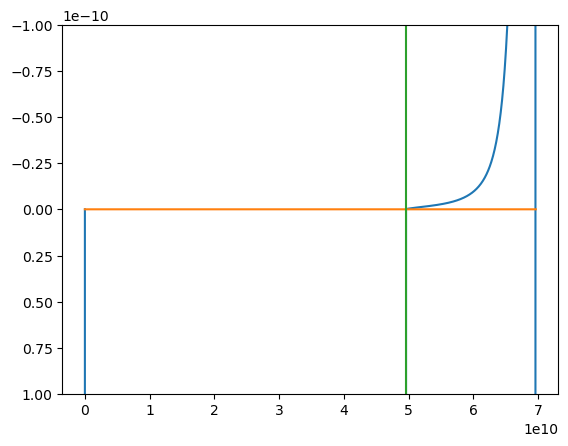

In [80]:
# find base of convection zone (where N^2 = 0)
plt.plot(di.rr, di.nsq)
plt.ylim(1e-10, -1e-10)

# bracket the BCZ
r1, r2 = 4e10, 6e10
ir1, ir2 = np.argmin(np.abs(di.rr - r1)), np.argmin(np.abs(di.rr - r2))

di.irbcz = ir2 + np.argmin(np.abs(di.nsq[ir2:ir1]))
di.rbcz = di.rr[di.irbcz]

plt.plot(di.rr, np.zeros_like(di.rr))

plt.plot(di.rbcz*np.ones(100), np.linspace(-1e-10,1e-10, 100) )

In [81]:
# compute F_rad
di.frad = -4*np.pi*di.rr**2 * di.rho*di.c_p*di.kappa*di.dtmpdr

In [82]:
# read in alternative F_rad from Jorgen
f = open("Model_S_Frad.txt", "r")
lines_frad = f.readlines()
f.close()
lines_frad

['#       r/R             l_rad/L\n',
 '       1.0007119       1.0000000\n',
 '       1.0007041       1.0000000\n',
 '       1.0006962       1.0000000\n',
 '       1.0006882       1.0000000\n',
 '       1.0006801       1.0000000\n',
 '       1.0006720       1.0000000\n',
 '       1.0006639       1.0000000\n',
 '       1.0006557       1.0000000\n',
 '       1.0006475       1.0000000\n',
 '       1.0006393       1.0000000\n',
 '       1.0006310       1.0000000\n',
 '       1.0006227       1.0000000\n',
 '       1.0006143       1.0000000\n',
 '       1.0006060       1.0000000\n',
 '       1.0005976       1.0000000\n',
 '       1.0005892       1.0000000\n',
 '       1.0005807       1.0000000\n',
 '       1.0005723       1.0000000\n',
 '       1.0005638       1.0000000\n',
 '       1.0005553       1.0000000\n',
 '       1.0005468       1.0000000\n',
 '       1.0005383       1.0000000\n',
 '       1.0005297       1.0000000\n',
 '       1.0005212       1.0000000\n',
 '       1.0005126       1

In [83]:
rr2 = []
frad2 = []
for line in lines_frad[1:]:
    st = line.split()
    rr2.append(float(st[0]))
    frad2.append(float(st[1]))
    
rr2 = np.array(rr2)
frad2 = np.array(frad2)

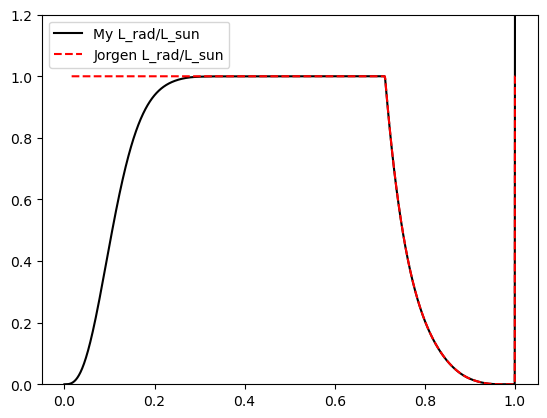

In [84]:
# check that my value and Uli's line up
plt.plot(di.rr/di.rsun, di.frad/di.lsun, 'k', label='My L_rad/L_sun')
plt.plot(rr2, frad2, 'r--', label='Jorgen L_rad/L_sun')

plt.ylim(0,1.2)
plt.legend()

In [85]:
# this must be because I divided by the constant L_sun, not L(r)
# anyway, I think everything works

(0.0, 35.0)

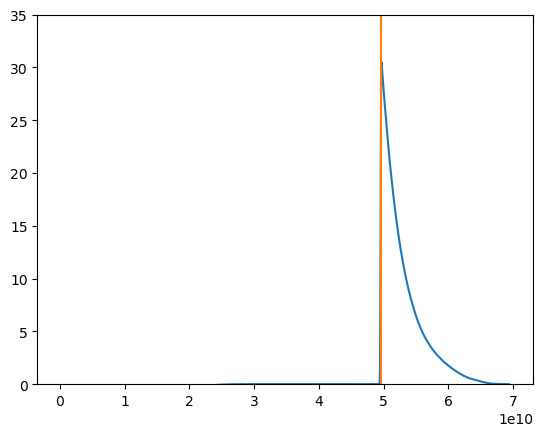

In [86]:
# also compute a volumetric heating
floc = di.frad/4/np.pi/di.rr**2
di.heat = - (np.gradient(floc, di.rr) + (2/di.rr)*floc)
plt.plot(di.rr, di.heat)
plt.plot(di.rbcz + np.zeros(100), np.linspace(0,35, 100))
plt.ylim(0,35)

In [87]:
# last thing... take Howe 2009, p. 32, Table 2 and get location and width of tachocline
di.rtach = di.rsun*np.mean(np.array([0.692, 0.68, 0.705, 0.6947, 0.695, 0.691, 0.693, 0.697, 0.6916]))
di.dtach = di.rsun*np.mean(np.array([0.09, 0.12, 0.0480, 0.033, 0.05, 0.01, 0.039, 0.019, 0.0162]))

# get indices associated with tachocline centroid (0) and upper and lower locations
r1, r2 = di.rtach - di.dtach/2, di.rtach + di.dtach/2
di.irtach = np.argmin(np.abs(di.rr - di.rtach))
di.irtach1 = np.argmin(np.abs(di.rr - r1))
di.irtach2 = np.argmin(np.abs(di.rr - r2))
di.rtach1 = di.rr[di.irtach1]
di.rtach2 = di.rr[di.irtach2]
            
print(di.rtach/di.rsun)
print(di.dtach/di.rsun)

print(di.rtach1/di.rsun)
print(di.rtach2/di.rsun)

0.6932555555555555
0.04724444444444444
0.6696392773455656
0.7169675873528123


In [90]:
di.rr

array([6.96486560e+10, 6.96481085e+10, 6.96475567e+10, ...,
       5.81765728e+08, 5.77113851e+08, 1.00000000e-49])

In [103]:
# compute r_eta coordinate
# look at eta at top and bottom of RZ
print(di.eta[-1],di.eta[di.irbcz]) # verify Pascale (1999)'s quoted values...pretty good

20.96177051027703 557.4750659956262


eta_const: 82.81121173489976
r_etaconst/rbcz 0.41098522563775813


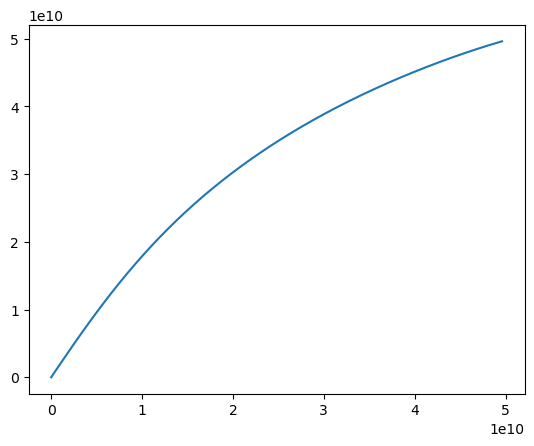

In [109]:
di.rrrz = di.rr[di.irbcz:] # radius in RZ
di.nr = len(di.rr)
di.nrrz = len(di.rrrz)
integrand = 1./np.sqrt(di.eta[di.irbcz:])
di.reta = np.zeros(di.nrrz)
for ir in range(di.nrrz):
    di.reta[ir] = -simpson(integrand[ir:], di.rrrz[ir:])
di.etaconst = (di.rbcz/di.reta[0])**2
di.reta *= di.rbcz/di.reta[0] # normalize by top value (full integral)

di.iretaconst = np.argmin(np.abs(di.eta - di.etaconst))
di.retaconst = di.rr[di.iretaconst]

plt.figure()
plt.plot(di.rrrz, di.reta)
print("eta_const:", di.etaconst)
print("r_etaconst/rbcz", di.retaconst/di.rbcz)

In [110]:
#help(simpson)

In [111]:
di.nr

2482

In [112]:
di.irbcz

1439

In [113]:
di.keys()

dict_keys(['msun', 'rsun', 'lsun', 'zsun', 'x0sun', 'alphasun', 'agesun', 'rr', 'lnq', 'grav', 'tmp', 'prs', 'rho', 'xfrac', 'lum', 'opa', 'eps', 'gamma', 'gamma_ad', 'delta', 'c_p', 'mue', 'ne', 'dsdr', 'nsq', 'zfrac', 'Ne', 'nu', 'kappa', 'eta', 'prm', 'pr', 'drhodr', 'dtmpdr', 'dprsdr', 'dlnrho', 'dlntmp', 'dlnprs', 'gas_constant', 'ircut', 'rcut', 'irbcz', 'rbcz', 'frad', 'heat', 'rtach', 'dtach', 'irtach', 'irtach1', 'irtach2', 'rtach1', 'rtach2', 'rrrz', 'nr', 'nrrz', 'reta', 'etaconst', 'iretaconst', 'retaconst'])

In [114]:
# OK, convert everything to binary
f = open("Model_S.pkl", "wb")
pickle.dump(di.copy(), f, protocol=4)
f.close()